# APIs Externas

#### Hola! 👋

En este notebook, aprenderás a trabajar con APIs externas desde Python. Las APIs (Application Programming Interfaces) son herramientas poderosas que permiten a nuestras aplicaciones interactuar con otros servicios y obtener datos en tiempo real.

**Estructura:**  
1. **Llamado la API de Spotify**
2. **Obtener información sobre las canciones más escuchadas con la API de spotify ocupando `spotipy`**
3. **Obtener data de INEGI a través de su API y graficarla con matplotlib**
4. **Ocupar GTP a través de su API**

## 🎧 Spotify

### 🎤 Obtener información sobre un artista

Antes de comenzar a ocupar la API, necesitamos definior una función para obtener un token de acceso. Este token es necesario para autenticar nuestras solicitudes a la API de Spotify.

- **`CLIENT_ID` y `CLIENT_SECRET`:** identificadores únicos de nuestra aplicación.
- **`get_spotify_token()`:** función que:
  - Hace una solicitud HTTP POST a la API de autenticación de Spotify.
  - Incluye las credenciales de la aplicación.
  - Recibe un token de acceso válido por un tiempo limitado.

> 🚨 **Concepto clave:**  
El token de acceso es como una llave temporal que necesitas para interactuar con la API. Debes renovarlo cuando expire y sobre todo NUNCA COMPARTIRLO, es como la contraseña de tus servicios.


**¿Cómo se obtiene?**

Se obtiene:
  1. ingresando en [Web API | Spotify for Developers](https://developer.spotify.com/documentation/web-api), 
  2. creando una cuenta para desarrolladores con tu cuenta de Spotify
  3. creando una app
  4. copiando tu CLIENT_ID y CLIENT_SECRET




In [15]:
import requests

# Configura tus credenciales de la aplicación
CLIENT_ID = "a692c00c0b884e58827eb76741d11444" # correo
CLIENT_SECRET = "39957993f0eb42e7a64dfb2ed530cbd3" # contraseña

# Obtener token de Spotify
def get_spotify_token():
    url = "https://accounts.spotify.com/api/token"
    headers = {"Content-Type": "application/x-www-form-urlencoded"}
    data = {
        "grant_type": "client_credentials",
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
    }
    response = requests.post(url, headers=headers, data=data)
    response.raise_for_status()
    return response.json()["access_token"]

Una vez que ya tenemos esa conexión, haremos una nueva función llamda `get_spotify_data` que utiliza el token de acceso para obtener información desde un endpoint específico de Spotify. En este ejemplo, obtenemos información sobre un artista utilizando su ID.

- **Parámetros importantes:**
  - **`endpoint`:** especifica la ruta de la API a consultar (por ejemplo, "artists/{artist_id}").
  - **`artist_id`:** identificador único del artista en Spotify.


In [16]:
# Obtener datos de la API de Spotify
def get_spotify_data(endpoint):
    token = get_spotify_token()
    url = f"https://api.spotify.com/v1/{endpoint}"
    headers = {"Authorization": f"Bearer {token}"}
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    return response.json()

# Ejemplo: obtener datos de un artista por su ID
artist_id = "4dpARuHxo51G3z768sgnrY"  # ID de Adele
artist_data = get_spotify_data(f"artists/{artist_id}")

# Mostrar resultados
print(f"Nombre: {artist_data['name']}")
print(f"Popularidad: {artist_data['popularity']}")
print(f"Géneros: {', '.join(artist_data['genres'])}")

Nombre: Adele
Popularidad: 87
Géneros: british soul, pop, pop soul, uk pop


### 👍 Canciones más escuchadas

Bien, hasta ahora hemos una solicitud sencilla, pero ¿Qué pasaría si quisiéramos ocupar algo más complejo? como por ejemplo, obtener mi top de canciones del 2024, igual que en Spotify Wrapped. Para ello, usaremos la librería `Spotipy` para manejar la autenticación y el flujo de permisos (OAuth 2.0) con Spotify. Este método es más avanzado y permite acceder a datos relacionados con usuarios.

En este caso, yo usaré mi token asignado a mi cuenta de Spotify para mostrar mis artistas más escuchados en 2024.

- **Parámetros necesarios:**
  - **`REDIRECT_URI`:** URL donde Spotify redirige después de autenticar al usuario.
  - **`SCOPE`:** permisos que solicitamos (en este caso, acceso a canciones más escuchadas).

**Parámetros de la función:**  
- **`get_top_tracks_last_year()`:** obtiene las canciones más escuchadas del último año (aproximado). Muestra:
  - Posición en el ranking.
  - Nombre de la canción.
  - Artista(s).
  - Álbum.



In [18]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Configuración de credenciales y alcance
CLIENT_ID = "a692c00c0b884e58827eb76741d11444"
CLIENT_SECRET = "39957993f0eb42e7a64dfb2ed530cbd3"
REDIRECT_URI = "http://localhost:8888/callback"  # URL de redirección
SCOPE = "user-top-read"  # Permiso para leer canciones más escuchadas

# Inicializar autenticación con Spotify
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope=SCOPE
))

# Función para obtener canciones más escuchadas del último año (usando medium_term como aproximación)
def get_top_tracks_last_year(limit=10):
    """
    Obtiene las canciones más escuchadas del último año (aproximado con medium_term).
    """
    results = sp.current_user_top_tracks(time_range="short_term", limit=limit)
    top_tracks = []
    for idx, item in enumerate(results['items']):
        track = {
            "rank": idx + 1,
            "name": item['name'],
            "artist": ", ".join([artist['name'] for artist in item['artists']]),
            "album": item['album']['name']
        }
        top_tracks.append(track)
    return top_tracks

# Obtener y mostrar las canciones
top_tracks = get_top_tracks_last_year(limit=20)

print("Tus canciones más escuchadas del último año:")
for track in top_tracks:
    print(f"{track['rank']}. {track['name']} -- {track['artist']} (Álbum: {track['album']})")


Tus canciones más escuchadas del último año:
1. I Hate You (You Hate Me) -- DWLLRS (Álbum: I Hate You (You Hate Me))
2. New York -- Junior Varsity (Álbum: New York)
3. Rushh -- Junior Varsity (Álbum: SIDE B)
4. Cross The Street -- Junior Varsity (Álbum: Cross The Street)
5. walls -- Marlhy (Álbum: walls)
6. Kryptonite -- 3 Doors Down (Álbum: The Better Life)
7. ¿A Dónde Van los Muertos? -- Kinky (Álbum: Reina)
8. Spanish Bombs -- Hinds (Álbum: Spanish Bombs)
9. All Eyes on Me -- The Goo Goo Dolls (Álbum: Dizzy up the Girl)
10. Waiting for You -- Hinds (Álbum: The Prettiest Curse)
11. Good Bad Times -- Hinds (Álbum: The Prettiest Curse)
12. I'm Just Trying To Love You -- Monobloc (Álbum: I'm Just Trying To Love You)
13. Too Late Now -- Wet Leg (Álbum: Wet Leg)
14. Blue Spirits -- DWLLRS (Álbum: Blue Spirits)
15. Your Hand In Mine - Remastered -- Explosions In The Sky (Álbum: The Earth Is Not a Cold Dead Place (Anniversary Edition))
16. Sick Cycle Carousel -- Lifehouse (Álbum: No Name Fa

### 🧑‍🧑‍🧒‍🧒 Artistas mas escuchados

Similar a la celda anterior, usamos `Spotipy` para obtener datos sobre los artistas más escuchados por el usuario en el último año.

- **Función destacada:**
  - **`get_top_artists_last_year()`:** devuelve una lista de los artistas más escuchados. Muestra:
    - Posición en el ranking.
    - Nombre del artista.
    - Géneros musicales.
    - Popularidad (en una escala de 0 a 100).

In [19]:
# Inicializar autenticación con Spotify
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope=SCOPE
))

# Función para obtener artistas más escuchados del último año (usando medium_term como aproximación)
def get_top_artists_last_year(limit=10):
    """
    Obtiene los artistas más escuchados del último año (aproximado con medium_term).
    """
    results = sp.current_user_top_artists(time_range="medium_term", limit=limit)
    top_artists = []
    for idx, item in enumerate(results['items']):
        artist = {
            "rank": idx + 1,
            "name": item['name'],
            "genres": ", ".join(item['genres']),
            "popularity": item['popularity']
        }
        top_artists.append(artist)
    return top_artists

# Obtener y mostrar los artistas
top_artists = get_top_artists_last_year(limit=10)

print("Tus artistas más escuchados del último año:")
for artist in top_artists:
    print(f"{artist['rank']}. {artist['name']} (Géneros: {artist['genres']}, Popularidad: {artist['popularity']})")


Tus artistas más escuchados del último año:
1. Hinds (Géneros: bubblegrunge, indie surf, Popularidad: 46)
2. Placebo (Géneros: alternative rock, britpop, permanent wave, rock, Popularidad: 66)
3. Bratty (Géneros: sinaloa indie, Popularidad: 60)
4. The Goo Goo Dolls (Géneros: neo mellow, permanent wave, pop rock, post-grunge, Popularidad: 77)
5. Dehd (Géneros: bubblegrunge, countrygaze, surf punk, Popularidad: 48)
6. Men I Trust (Géneros: indie pop, pov: indie, Popularidad: 72)
7. BETWEEN FRIENDS (Géneros: indie pop, la pop, pov: indie, Popularidad: 60)
8. Explosions In The Sky (Géneros: american post-rock, cinematic post-rock, instrumental post-rock, melancholia, post-rock, Popularidad: 51)
9. NewDad (Géneros: irish indie rock, irish shoegaze, Popularidad: 53)
10. girl in red (Géneros: bedroom pop, indie pop, norwegian indie, pov: indie, Popularidad: 77)


Si observas, cuando obtuvimos la información de **Adele** hicimos un llamado con `requests`, a diferencia de cuando hicimos un llamado a nuestras canciones y artistas favoritos, pues lo hicimos a través con `spotipy`, la cual es una librería.

Esta diferencia es importante, porque aun cuando un servicio tenga API, no necesariamente tiene una librería que lo sustente. Por lo general, las librerías son creadas por la comunidad.

En dado caso de que no exista alguna librería, entonces tendrás que consumir la API desde `requests`


----

Esto y más se puede hacer con la API de Spotify 😦 básicamente todo lo que hace la app de tu celular o compu pero del lado de código.

Para mayor información sobre qué mas puedes hacer con la API de Spotify, te recomendamos revisar su [documentación](https://developer.spotify.com/documentation/web-api), por ejemplo [cómo obtener recomendaciones](https://developer.spotify.com/documentation/web-api/reference/get-recommendations)

Asimismo puedes dar `control + click` o `command + click` a los métodos de `sp`, como por ejemplo en `sp.current_user_top_artists`. Esto te llevará a las funciones que se ahn construido en `spotipy` y ver qué otras cosas puedes traer con la API de tu usuario.

#### 🚨 **Nota**: 

Puedes intentar pedirle a **Chat-GPT** u otra IA que genere un código para conectarse a la API de spotify (o cualquier otro servicio) y únicamente sustituir los valores de `ID` y `Llave`. 

Igualmente, puedes pedirle algo más específico como *"Que el código se conecte a la API y traiga todas mis canciones favoritas"*, o *"Un código para que extraifa la info de alguna canción"*

## 🌎 INEGI

Bien, hasta ahora hemos hecho APIs por nuestra cuenta e igualmente hemos consumido la API de un servicio como Spotify. Existen miles de APIs más de los servicios o productos que ocupamos en nuestro día a día, y una útil para los economistas es la de INEGI.

Esta API es de uso público, basta con solicitar un TOKEN en su página y leer la documentación o utilizar el [Constructor de Consultas](https://www.inegi.org.mx/servicios/api_indicadores.html#collapse3) para saber qué serie queremos descargar.

Para el siguiente ejemplo accederemos a la API del INEGI para obtener información de una serie específica de indicadores económicos. Usamos un token personal para autenticar nuestra solicitud.

- **Parámetros importantes:**
  - **`INEGI_TOKEN`:** token personal de acceso.
  - **`ID_SERIE`:** identificador único de la serie de interés.
  - **`RECIENTE`:** indica si queremos datos históricos o recientes.

**Flujo de trabajo:**
1. Hacemos una solicitud GET a la URL de la API del INEGI.
2. Verificamos si la respuesta es exitosa.
3. Parseamos el JSON recibido para extraer los datos de la serie.


In [20]:
import requests

# Reemplaza '[Aquí va tu Token]' con tu token personal proporcionado por INEGI
INEGI_TOKEN = "b9d62aa4-ee6b-58d4-7474-6623a985f843"
ID_SERIE = "444559"  # ID de la serie de interés
RECIENTE = "false"  # Indica si se desea la información más reciente ("true") o histórica ("false")

INEGI_URL = f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/{ID_SERIE}/es/0700/{RECIENTE}/BIE/2.0/{INEGI_TOKEN}?type=json"

# Hacer la solicitud a la API
response = requests.get(INEGI_URL)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()  # Parsear el JSON
    # Acceder a la información deseada
    series = data.get("Series", [])
    for serie in series:
        print(f"Indicador: {serie.get('INDICADOR')}")
        print("Observaciones:")
        for obs in serie.get("OBSERVATIONS", []):
            print(f"Fecha: {obs.get('TIME_PERIOD')}, Valor: {obs.get('OBS_VALUE')}")
else:
    print(f"Error en la solicitud: {response.status_code}")


Indicador: 444559
Observaciones:
Fecha: 2024/10, Valor: 97.499818419346
Fecha: 2024/09, Valor: 97.077486411958
Fecha: 2024/08, Valor: 96.962628385074
Fecha: 2024/07, Valor: 97.072599333775
Fecha: 2024/06, Valor: 97.22497587682
Fecha: 2024/05, Valor: 97.378224569077
Fecha: 2024/04, Valor: 97.389263160558
Fecha: 2024/03, Valor: 97.717932919555
Fecha: 2024/02, Valor: 97.545997400555
Fecha: 2024/01, Valor: 97.14697598045
Fecha: 2023/12, Valor: 97.386240214107
Fecha: 2023/11, Valor: 97.2872917068
Fecha: 2023/10, Valor: 97.254003853689
Fecha: 2023/09, Valor: 97.122578909026
Fecha: 2023/08, Valor: 97.04465401426
Fecha: 2023/07, Valor: 96.870130200668
Fecha: 2023/06, Valor: 97.347967079695
Fecha: 2023/05, Valor: 97.068874563046
Fecha: 2023/04, Valor: 97.177201322192
Fecha: 2023/03, Valor: 97.607459319227
Fecha: 2023/02, Valor: 97.27956806394
Fecha: 2023/01, Valor: 97.000338707386
Fecha: 2022/12, Valor: 97.236649066966
Fecha: 2022/11, Valor: 97.153227725986
Fecha: 2022/10, Valor: 96.70001228904

🤔 bien...pero, los datos están en un formato que nos complica el poder explotarlos. Para ello, vamos a crear un código que nos transforme esos datos en un pandas dataframe, el cual será más fácil de manipular y explotar

In [21]:
import requests
import pandas as pd

# Reemplaza '[Aquí va tu Token]' con tu token personal proporcionado por INEGI
INEGI_TOKEN = "b9d62aa4-ee6b-58d4-7474-6623a985f843"
ID_SERIE = "444559"  # ID de la serie de interés
RECIENTE = "false"  # Indica si se desea la información más reciente ("true") o histórica ("false")

INEGI_URL = f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/{ID_SERIE}/es/0700/{RECIENTE}/BIE/2.0/{INEGI_TOKEN}?type=json"

# Hacer la solicitud a la API
response = requests.get(INEGI_URL)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()  # Parsear el JSON
    # Extraer las observaciones en una lista de diccionarios
    series = data.get("Series", [])
    all_observations = []
    
    for serie in series:
        observations = serie.get("OBSERVATIONS", [])
        for obs in observations:
            all_observations.append({
                "Fecha": obs.get("TIME_PERIOD"),
                "Valor": obs.get("OBS_VALUE")
            })
    
    # Crear el DataFrame
    df = pd.DataFrame(all_observations)
    display(df)
else:
    print(f"Error en la solicitud: {response.status_code}")


,Fecha,Valor
0,2024/10,97.499818419346
1,2024/09,97.077486411958
2,2024/08,96.962628385074
3,2024/07,97.072599333775
4,2024/06,97.22497587682
...,...,...
233,2005/05,96.696307350651
234,2005/04,96.636587716892
235,2005/03,96.372924626318
236,2005/02,96.226697563311


🎉🎉🎉🎉 Super! 

Ahora ya podemos utilizar ese dataframe para gráficarlo o explotarlo de la mejor manera posible, incluso haciendo un modelo de series de tiempo, como los que has aprendido en el cuso.

Por ahora, vamos a graficar esa serie de manera muy sencilla utilizando `matplotlib`

/var/folders/09/l_y2qlvx013485dvg93j5_240000gn/T/ipykernel_10995/1728538523.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Fecha"] = pd.to_datetime(df["Fecha"])


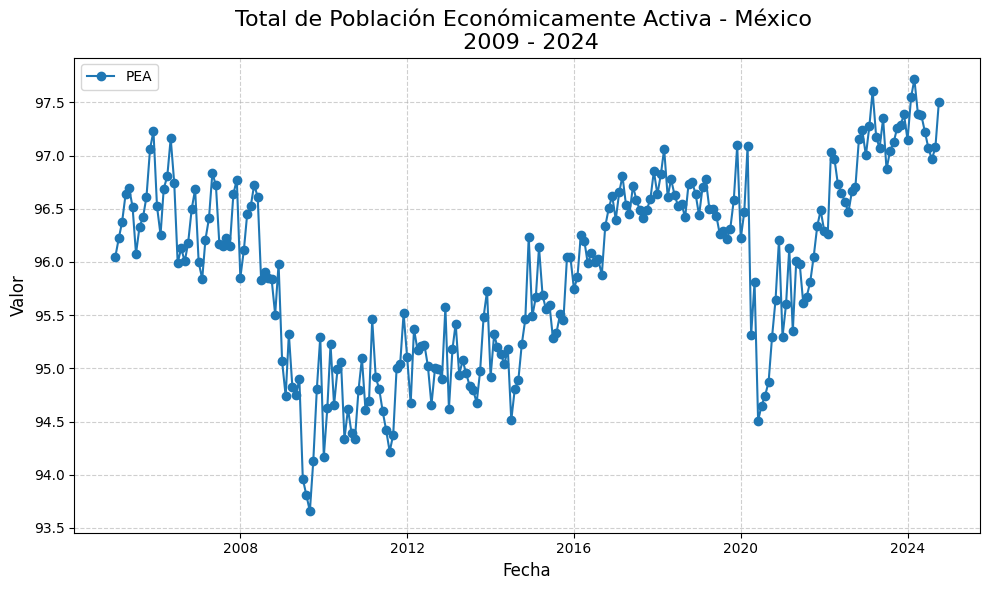

In [22]:
import matplotlib.pyplot as plt

# Asegúrate de que el DataFrame 'df' ya esté definido
# Convertir la columna "Fecha" a tipo datetime y "Valor" a float (si no lo está)
df["Fecha"] = pd.to_datetime(df["Fecha"])
df["Valor"] = pd.to_numeric(df["Valor"], errors="coerce")  # Convierte a float, ignora valores inválidos

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(df["Fecha"], df["Valor"], marker='o', linestyle='-', label="PEA")

# Personalizar el gráfico
plt.title(f"Total de Población Económicamente Activa - México \n 2009 - 2024", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Intenta probar con los siguientes IDs de series:
* `472079` -> PIB total nacional
* `702094` -> Índice global de personal ocupado de los sectores económicos (construcción, industrias manufactureras, comercio al por mayor, comercio al por menor y servicios privados no financieros)
* `6204138038` -> Balanza comercial de la industria manufacturera.. Saldo Importaciones Papel, imprenta e industria editorial. Valores absolutos

🎉🎉🎉 **¡Genial!**

Ahora que tenemos un gráfico funcional con los datos de la API de INEGI, las posibilidades son infinitas. Aquí tienes algunas ideas emocionantes de lo que podrías hacer:

- 📈 **Pronósticos Automatizados**  
  Configura un proceso para:
  1. Consultar las series del INEGI automáticamente cada mes.
  2. Aplicar un modelo de predicción (como ARIMA o Prophet).
  3. Enviar un reporte automático por correo con un gráfico que muestre las tendencias económicas y predicciones futuras.

  ¡Podrías convertirte en el analista estrella de tu equipo!

- 🔔 **Alertas Inteligentes**  
  Configura un sistema de alertas que:
  - Supervise indicadores económicos clave (como inflación o empleo).
  - Envíe notificaciones automáticas (por correo, Slack o Telegram) si detecta cambios inusuales.

  Por ejemplo: "📊 **¡Alerta!** La inflación ha superado el 5%. Aquí tienes los datos más recientes."

- 🎮 **Gamificación de Datos**  
  Crea un dashboard interactivo donde los usuarios puedan:
  - Elegir series específicas del INEGI y ver gráficos en tiempo real.

- 🛠️ **Aplicaciones Personalizadas**  
  Imagina integrar esta API en una aplicación móvil o web para:
  - Generar visualizaciones interactivas con gráficos dinámicos.
  - Ayudar a las empresas a tomar decisiones basadas en datos macroeconómicos recientes.

  ¡Podrías construir una herramienta imprescindible para analistas!

- 🤖 **Data Science con Esteroides**  
  Usa los datos del INEGI como entrada para modelos de machine learning. Algunas ideas:
  - Predecir comportamientos del mercado laboral.
  - Encontrar correlaciones inesperadas entre diferentes indicadores económicos.

  ¡Explorar estos datos puede ayudarte a descubrir patrones sorprendentes y útiles!

💡 **Tu imaginación es el techo!** Y si aún no te sientes muy seguro de programar, no te preocupes, todas estas propuestas y algunas más pueden ser programas en su totalidad con alguna IA, sólo recuerda ser muy explícito y pasarle el contexto de qué quieres hacer.


✏️ Nota: Puedes consultar `INEGYPy`, una librería de [`@andreslomeliv`](https://github.com/andreslomeliv) la cual hace una conexión directa a la API de Inegi, aunque de forma mpas estructurada.

Este [notebook](https://github.com/andreslomeliv/DatosMex/tree/master/INEGIpy) incluye ejercicios interesantes, como la extracción de datos en pandas dataframe de forma sencilla y plots de mapas geográficos con datos de INEGI


## 🤖 OpenAI

🎉 **¡Al fin! Hemos llegado a la última API, la de OpenAI.**

Esta API nos permite consultar todos los servicios de Inteligencia Artificial que tiene disponibles OpenAI, entre ellos a GPT. 

Seguro has visto cientos de apps recientemente que tiene integrado GPT...¿Cómo funcionan? pues con un llamado a la API de OpenAI! justo como lo haremos a continuación.

Por lo tanto, si queremos ocupar GPT desde acá sin la necesidad de meternos a Chat-GPT, podemos ocupar la API.

Nos responderá igual que cuando ingresamos al chat. 

Para ello también necesitamos un token para acceder el cual podemos generar desde el [sitio de OpenAI](https://platform.openai.com/playground/chat). Hay que considerar que para esta API se necesita pagar por el servicio, por lo que cuando crees tu cuenta necesitarás abonar en USD una cantidad para que puedas comenzar a consumir la API

OpenAI cobra por tokens dependiendo del modelo que ocupes, puedes consultar más en [este link](https://openai.com/api/pricing/) sobre los costos y en [este sitio](https://tiktokenizer.vercel.app) puedes pegar tu texto para que sepas cuántos tokens hay en él.

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="")

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": "Hola GPT, ¿cómo estás?"},
    ]
)

print(completion.choices[0].message.content)

---- FIN DEL NOTEBOOK ----